# Air Drag on Falling Cones



New t_sigma:  [0.11120252 0.08228001 0.07117584 0.06264184 0.02856571 0.02271563
 0.03009983]
Times matrix: 
 [[6.44 6.47 5.85 5.47 4.82 4.25 3.37]
 [6.14 6.22 5.87 5.29 4.94 4.15 3.4 ]
 [6.69 6.44 5.94 5.68 4.84 4.19 3.47]
 [6.69 6.63 6.22 5.53 4.78 4.28 3.53]
 [6.72 6.69 6.1  5.47 4.79 4.21 3.5 ]]
Avg Times: 
[6.536 6.49  5.996 5.488 4.834 4.216 3.454]

STD DEV: 1.1734867865021905
GRADIENT: 0.00015348877435878924

C_d: 0.6346080082436505
C_d uncertainty:  0.008252795973940172

Delta A (uncertainties) [8.58509142e-06 2.45151280e-07]


Text(0, 0.5, 'Mass (kg)')

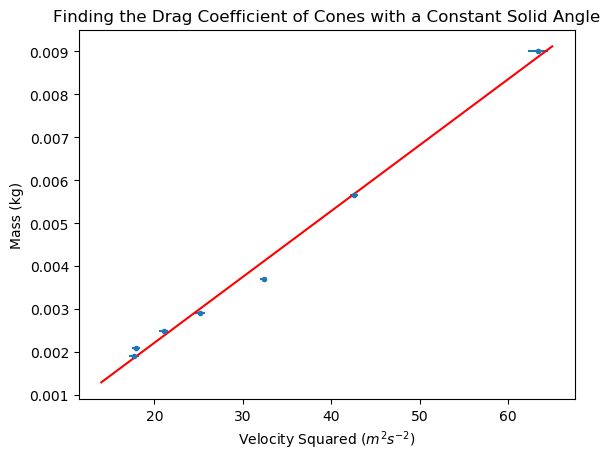

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""
TODO:

- Someone check everything I've done
- Change title of graph

"""

# Importing the data
data = np.genfromtxt("conesfinal.csv", delimiter=",")

# Model for the line of best fit
def model(p,x):
    return p[0] + p[1]*x

# A few constants

distance = 27.5
distance_sigma = 2/100 

m_unc = 0.00001
TRIALS = 5

# Extracting data from imported file

m = np.array(data[:,0])
m_sigma = np.full(len(data[:,0]), m_unc)

t1 = np.array(data[:,1])
t2 = np.array(data[:,2])
t3 = np.array(data[:,3])
t4 = np.array(data[:,4])
t5 = np.array(data[:,5])
t_2d = np.array([t1, t2, t3, t4, t5])

## ddof=1 means it's taking the sample stddev rather than population stddev
## calculates the uncertainties for t using a list comprehension
## (Very pythonic but not very readable)
t_sigma = np.array([np.std(x, ddof=1)/np.sqrt(TRIALS) for x in t_2d.transpose()])
print("New t_sigma: ", t_sigma)
print("Times matrix: \n",t_2d)

# Averaging time arrays
t = (t1+t2+t3+t4+t5)/TRIALS
print("Avg Times: ")
print(t)


# Calculating v and v squared arrays
v = distance/t
vs = v**2


print()
print("STD DEV: "+str(np.std(t, ddof=1)))
vs_sigma = np.sqrt((distance**2/t**4)*distance_sigma**2+(4*distance**4/t**6)*t_sigma**2)

## Assigning arrays to x and y named things to simplify the plotting

x = vs
y = m
sigma_x = vs_sigma
sigma_y = m_sigma

# Calculating the line of best fit

bf = np.zeros((2,len(data)))
bf[0,:] = x**0
bf[1,:] = x

A = np.zeros((2,2))
b = np.zeros(2)
for k in range(2):
    for j in range(2):
        A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
    b[k] = np.sum(y*bf[k,:]/sigma_y**2)
              
A_inv = np.linalg.inv(A)
a = np.linalg.solve(A,b)



### VARS for coefficient

omega = 0.4
phi = omega*np.sqrt((4*np.pi)/(omega)-1)
phi = 2.206
g = 9.807
p = 1.225
r = 0.1
A = ((r**2)*(phi**2))/(4*np.pi)

###

# Extracting and printing the gradient
grad = a[1]
print("GRADIENT: "+str(grad))
print()

A_sigma = 4.998*10**(-5)

grad_sigma = np.sqrt(np.diag(A_inv))[1]



# Calculating C_d
C_d = (grad*2*g)/(p*A)
print("C_d: "+str(C_d))

# Uncertainty in C_d
grad_sigma = np.sqrt(np.diag(A_inv))[1]
C_d_sigma = np.sqrt((((2*g)/(A*p))**2)*grad_sigma**2 + (((-2*g*grad)/((A**2)*p))**2)*A_sigma**2)
print("C_d uncertainty: ", C_d_sigma)

# Uncertainty in the gradient
print()
print("Delta A (uncertainties)", np.sqrt(np.diag(A_inv)))

## Graphing

xx = np.linspace(14,65,1000) # Range for line of best fit

plt.rcdefaults()  # turn off xkcd
plt.figure()
plt.errorbar(x,y,sigma_y,sigma_x,fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding the Drag Coefficient of Cones with a Constant Solid Angle")
plt.xlabel('Velocity Squared ($m^2s^{-2}$)')
plt.ylabel('Mass (kg)')
